# 0 - Carregando bibliotecas

Nessa etapa, costuma-se dedicar a importação das bibliotecas que serão utilizadas no desenvolvimento do algoritmo de predição

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt

# 1 - Abertura do dados

Aqui, é feito o carregamento dos dados que serão utlizados para treino e teste do algoritmo

In [14]:
cancer = load_breast_cancer()
cancer.loc(2)

AttributeError: loc

# 2 - Divisão em treinamento e teste

Uma alternativa para separar os dados de treino e teste, é a utilização da função train_test_split presente na biblioteca sklearn.model_selection

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 3 - Padronização dos dados

Utilizando a classe StandardScaler da biblioteca sklearn.preprocessing, realizaremos a padronização dos dados.

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição.

Gausiana com média igual a 0 e desvio padrão igual a 1.

Para mais informações acesse meu blog: [Q.G do Tux](https://nic1611.github.io/blog/post/normalizacao_e_padronizacao/)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 4 -  Classificação com knn

Aqui é onde a mágica acontece :)

A função KNeighborsClassifier da biblioteca sklearn.neighbors facilita o o calculo dos vizinhos mais próximos.

Utilizamos um laço de repetição for para calcular a distância de até K vizinhos = 22.

In [17]:

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,22)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_std,y_train)
    training_accuracy.append(knn.score(X_train_std, y_train))
    test_accuracy.append(knn.score(X_test_std, y_test))
 


# 5 - Avaliação de acurácia

Por último, criamos um gráfico para vizualizar a acurácia das predições feitas com os diferentes K selecionados.

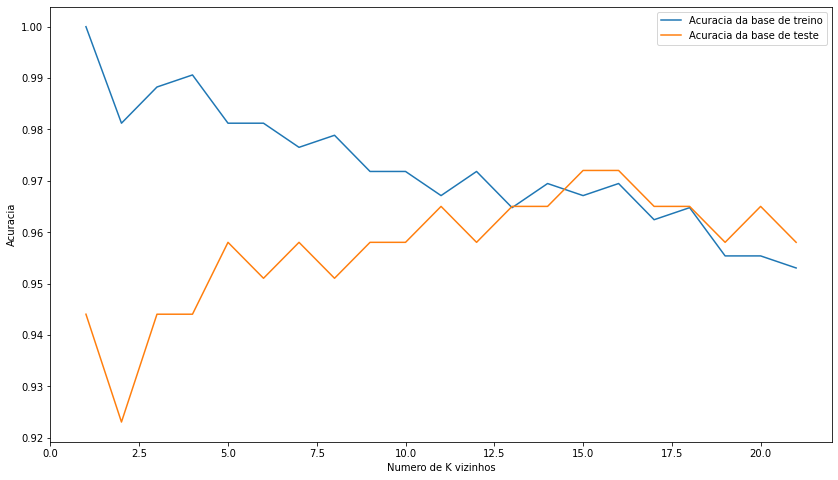

In [18]:
plt.figure(figsize=(14,8)) 
plt.plot(neighbors_setting,training_accuracy, label='Acuracia da base de treino')
plt.plot(neighbors_setting,test_accuracy, label='Acuracia da base de teste')
plt.ylabel('Acuracia')
plt.xlabel('Numero de K vizinhos')
plt.legend()